# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:indigo;overflow:hidden"><b>VotingClassifier: A Powerful Ensemble Technique</b></div>

In [1]:
!pip install category_encoders

**VotingClassifier is a machine learning ensemble method that combines the predictions of multiple individual classifiers to improve overall performance. It's a simple yet effective technique that can enhance accuracy, robustness, and generalization capabilities of a model.**


<font color="darkred" size=+2 face="Comic Sans MS">How it works:</font>

- **Multiple Classifiers:** A VotingClassifier employs several base classifiers, each trained independently on the same dataset.
- **Prediction Combination:** When making predictions on new data, each classifier provides its own prediction.
- **Voting Mechanism:** The final prediction is determined by combining these individual predictions using a voting mechanism.

<font color="darkred" size=+2 face="Comic Sans MS">Voting Mechanisms:</font>

- **Hard Voting:** Each classifier's prediction is treated as a vote. The class with the most votes is considered the final prediction.
- **Soft Voting:** Each classifier's prediction is assigned a probability. The class with the highest average probability across all classifiers is selected as the final prediction.

<font color="darkred" size=+2 face="Comic Sans MS">Importance in Machine Learning:</font>


**1. Improved Accuracy:** By combining the predictions of multiple classifiers, VotingClassifier can often achieve higher accuracy than any individual classifier alone.

**2. Reduced Overfitting:** Ensembling can help mitigate overfitting, which occurs when a model becomes too specialized to the training data and performs poorly on new, unseen data.   

**3. Increased Robustness:** VotingClassifier is less sensitive to the idiosyncrasies of individual classifiers, making it more robust to noise and variations in the data.

**4. Enhanced Generalization:** By combining the strengths of different classifiers, VotingClassifier can improve the model's ability to generalize to new, unseen data.

**5. Versatility:** VotingClassifier can be used with various base classifiers, including decision trees, random forests, support vector machines, and neural networks.

Key Considerations:

- **Classifier Diversity:** To achieve the best results, the base classifiers should be as diverse as possible in terms of their algorithms and features.
- **Computational Cost:** Using multiple classifiers can increase computational overhead.
- **Hyperparameter Tuning:** The choice of base classifiers and voting mechanism may require careful hyperparameter tuning to optimize performance.

**In summary, VotingClassifier is a valuable tool in machine learning that can significantly improve model performance by combining the predictions of multiple classifiers. Its simplicity, effectiveness, and versatility make it a popular choice for various applications.**


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

# Load and preprocess the dataset
titanic = pd.read_csv('data/titanic1.csv')
titanic = titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Encode categorical variables
encoder = ce.OrdinalEncoder(['Sex', 'Embarked'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Define base models
estimators = [
    ('LR', LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200)),
    ('SVC', SVC(gamma='auto', probability=True)),
    ('DTC', DecisionTreeClassifier())
]

# Function to evaluate classifier without ROC curve
def evaluate_classifier_basic(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Cross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to evaluate classifier with ROC curve
def evaluate_classifier_with_roc(classifier, X_train, X_test, y_train, y_test):
    evaluate_classifier_basic(classifier, X_train, X_test, y_train, y_test)

    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

<font color="darkred" size=+2 face="Comic Sans MS">Hard VotingClassifier:</font>

**How it works:**

- Each classifier in the ensemble casts a vote for the class it predicts.
- The class with the most votes wins.

**Advantages:**
- Simple and intuitive to understand.
- Can be effective in reducing the variance of individual classifiers.

**Disadvantages:**
  
- Can be sensitive to the majority class, especially if one classifier is consistently wrong.
- May not be as accurate as soft voting if the classifiers have different confidence levels.

|Feature|Hard VotingClassifier|Soft VotingClassifier|
|--|--|--|
|Voting Method|Majority vote|Weighted average of probabilities|
|Sensitivity to Majority Class|Higher|Lower|
|Accuracy|Generally lower|Generally higher|
|Computational Cost|Lower|Higher|
|Requires Probability Estimates|No|Yes|

Hard Voting Classifier Results:
Accuracy: 0.7709
Precision: 0.7619
Recall: 0.6486
F1 Score: 0.7007
Cross-validation Score: 0.8063 (+/- 0.0871)


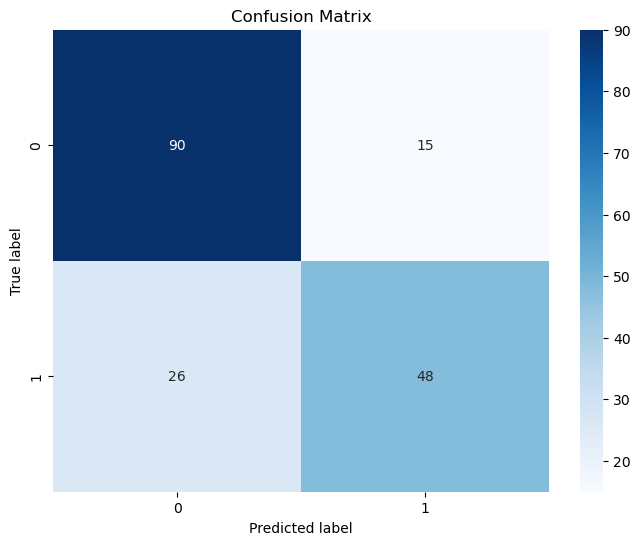

In [11]:
# Evaluate Hard Voting Classifier
print("Hard Voting Classifier Results:")
vot_hard = VotingClassifier(estimators=estimators, voting='hard')
evaluate_classifier_basic(vot_hard, X_train, X_test, y_train, y_test)


Soft Voting Classifier Results:
Accuracy: 0.7709
Precision: 0.7463
Recall: 0.6757
F1 Score: 0.7092
Cross-validation Score: 0.7866 (+/- 0.0782)


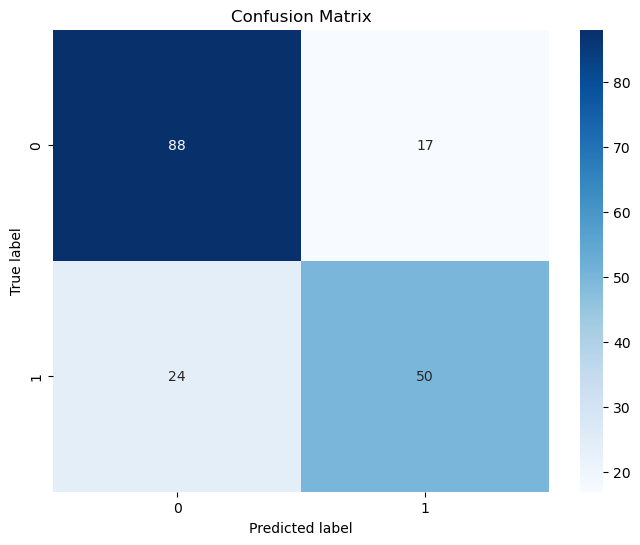

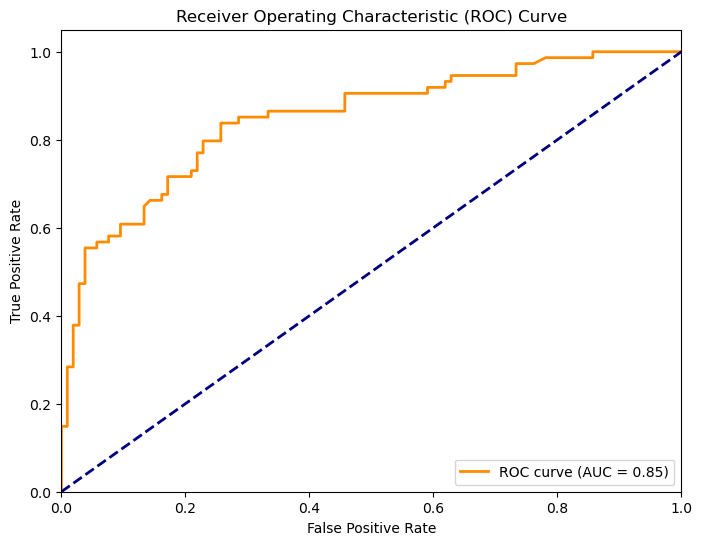

In [13]:
# Evaluate Soft Voting Classifier
print("\nSoft Voting Classifier Results:")
vot_soft = VotingClassifier(estimators=estimators, voting='soft')
evaluate_classifier_with_roc(vot_soft, X_train, X_test, y_train, y_test)

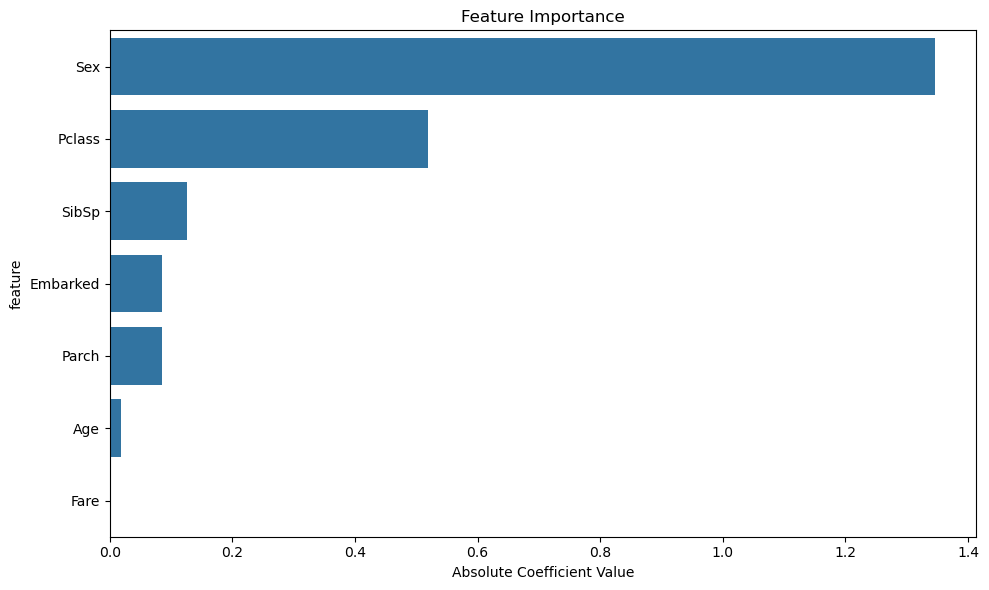

In [15]:
# Feature Importance (using Logistic Regression coefficients)
lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200)
lr_model.fit(X_train, y_train)
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr_model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:indigo;overflow:hidden"><b>Classification Metrics: A Comprehensive Guide</b></div>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score
from sklearn.metrics import recall_score, f1_score, precision_score, matthews_corrcoef, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Assuming X_train, X_test, y_train, y_test are already defined

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(criterion='entropy', n_estimators=100),
    'LightGBM': lgb.LGBMClassifier(),
    'Ridge Classifier CV': RidgeClassifierCV(),
    'XGBoost': XGBClassifier(),
    'Nearest Centroid': NearestCentroid(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Calibrated Classifier CV': CalibratedClassifierCV(),
    'Bernoulli NB': BernoulliNB(),
    'Bagging Classifier': BaggingClassifier(),
    'SVC': SVC(),
    'Linear SVC': LinearSVC(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB(),
    'Perceptron': Perceptron(),
    'SGD Classifier': SGDClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Nu SVC': NuSVC(),
    'Gaussian Process': GaussianProcessClassifier(kernel=RBF()),
    'Ridge Classifier': RidgeClassifier(),
    'Passive Aggressive': PassiveAggressiveClassifier(),
    'Hist Gradient Boosting': HistGradientBoostingClassifier()
}

# Train and predict
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    CM = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = CM.ravel()

    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mathew = matthews_corrcoef(y_test, y_pred)

    results.append([name, acc, balanced_acc, prec, rec, specificity, f1, roc, loss_log, mathew])

# Create DataFrame with results
model_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Balanced Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC AUC', 'Log Loss', 'Matthews Corrcoef'])

# Sort results by accuracy
model_results = model_results.sort_values('Accuracy', ascending=False).reset_index(drop=True)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<h1 style = "background-color: white; color : #fe346e; font-size: 40px; font-family:garamond; font-weight: normal; border-radius: 75px 150px; text-align: left"> Classification Metrics: A Comprehensive Guide </h1>

<p style="font-size:160%; color: Blue; font-family: Comic Sans MS; line-height: 1.5; text-align: justify;">
 When evaluating the performance of a classification model, several metrics are commonly used. Here's a breakdown of each metric, along with its importance:.
</p>

<font color="darkred" size=+2 face="Comic Sans MS">Accuracy</font>

- Definition: The ratio of correct predictions to the total number of predictions.
- Importance: A general measure of how well the model performs overall. However, it can be misleading in imbalanced datasets.

<font color="darkred" size=+2 face="Comic Sans MS">Balanced Accuracy</font>

- Definition: The average of sensitivity and specificity, providing a more balanced view in imbalanced datasets.
- Importance: Useful when dealing with imbalanced classes, as it accounts for both positive and negative predictions.

<font color="darkred" size=+2 face="Comic Sans MS">Precision</font>

- Definition: The ratio of true positive predictions to the total number of positive predictions.
- Importance: Measures how many of the positive predictions made by the model were actually correct.

<font color="darkred" size=+2 face="Comic Sans MS">Sensitivity (Recall)</font>

- Definition: The ratio of true positive predictions to the total number of actual positive instances.
- Importance: Measures how well the model can identify positive instances.

<font color="darkred" size=+2 face="Comic Sans MS">Specificity</font>

- Definition: The ratio of true negative predictions to the total number of actual negative instances.
- Importance: Measures how well the model can identify negative instances.

<font color="darkred" size=+2 face="Comic Sans MS">F1 Score</font>

- Definition: The harmonic mean of precision and recall.
- Importance: A balanced metric that considers both precision and recall, making it useful when both are important.

<font color="darkred" size=+2 face="Comic Sans MS">ROC AUC (Receiver Operating Characteristic Area Under the Curve)</font>

- Definition: The area under the ROC curve, which plots the true positive rate (sensitivity) against the false positive rate.
- Importance: A measure of the model's ability to discriminate between positive and negative classes, regardless of the classification threshold.

<font color="darkred" size=+2 face="Comic Sans MS">Log Loss (Cross-Entropy Loss)</font>

- Definition: A measure of the model's predicted probability distribution compared to the actual labels.
- Importance: Often used in machine learning algorithms, especially those that output probabilities. Lower log loss indicates better performance.

<font color="darkred" size=+2 face="Comic Sans MS">Matthews Correlation Coefficient (MCC)</font>

- Definition: A correlation coefficient between predicted and actual labels, considering true positives, true negatives, false positives, and false negatives.
- Importance: A more balanced metric than accuracy, especially for imbalanced datasets. It ranges from -1 (worst) to 1 (best).

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Choosing the Right Metrics:</span>

**The choice of metrics depends on the specific problem and the relative importance of different aspects of the model's performance. For example:**

- Imbalanced datasets: Balanced accuracy, F1 score, MCC, and ROC AUC are often preferred.
- When both precision and recall are important: F1 score is a good choice.
- When probability predictions are important: Log loss is useful.
  
In many cases, it's helpful to consider multiple metrics to get a comprehensive understanding of the model's performance.

In [31]:
model_results

,Model,Accuracy,Balanced Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC AUC,Log Loss,Matthews Corrcoef
0,XGBoost,0.832402,0.821236,0.823529,0.756757,0.885714,0.788732,0.821236,6.040836,0.651851
1,Extra Trees,0.832402,0.823230,0.814286,0.770270,0.876190,0.791667,0.823230,6.040836,0.652365
2,Random Forest,0.826816,0.814479,0.820896,0.743243,0.885714,0.780142,0.814479,6.242197,0.640008
3,LightGBM,0.821229,0.807722,0.818182,0.729730,0.885714,0.771429,0.807722,6.443558,0.628185
4,Linear SVC,0.815642,0.800965,0.815385,0.716216,0.885714,0.762590,0.800965,6.644919,0.616379
5,Gaussian NB,0.815642,0.802960,0.805970,0.729730,0.876190,0.765957,0.802960,6.644919,0.616566
6,Calibrated Classifier CV,0.815642,0.800965,0.815385,0.716216,0.885714,0.762590,0.800965,6.644919,0.616379
7,Logistic Regression,0.810056,0.794208,0.812500,0.702703,0.885714,0.753623,0.794208,6.846281,0.604584
8,Ridge Classifier,0.810056,0.794208,0.812500,0.702703,0.885714,0.753623,0.794208,6.846281,0.604584
9,Hist Gradient Boosting,0.810056,0.798198,0.794118,0.729730,0.866667,0.760563,0.798198,6.846281,0.605103


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC; ">Relationships Between Classification Metrics and Choosing the Right Ones for Generalized Results</span>

**Understanding the relationships between classification metrics and choosing the appropriate ones for generalized results is crucial in machine learning. Let's delve into these aspects:**

<font color="Blue" size=+2 face="Comic Sans MS">Relationships Between Metrics</font>

- **Complementary:** Some metrics provide complementary information. For instance, precision and recall can be combined to understand the trade-off between identifying positive instances correctly (precision) and identifying all positive instances (recall).
- **Derived:** Some metrics are derived from others. The F1 score, for example, is the harmonic mean of precision and recall.
- **Trade-offs:** Often, there is a trade-off between different metrics. For instance, increasing precision might decrease recall, and vice versa.

**Choosing Metrics for Generalized Results**

When selecting metrics for generalized results, consider the following factors:

**1. Dataset Characteristics:**

- **Imbalanced Classes:** If the dataset is imbalanced (one class has significantly more instances than the other), metrics like balanced accuracy, F1 score, and MCC are more appropriate.
- **Noise:** If the dataset contains noise or outliers, metrics that are less sensitive to individual errors, such as ROC AUC, can be helpful.

**2. Problem Domain:**

- **False Positives vs. False Negatives:** Consider the consequences of different types of errors. If false positives are more costly, focus on precision. If false negatives are more costly, focus on recall.
- **Probability Predictions:** If the model outputs probabilities, metrics like log loss can be used to evaluate the quality of the probability distribution.

**3. Evaluation Goals:**

- **Overall Performance:** Accuracy can be a good starting point, but be aware of its limitations in imbalanced datasets.
- **Class-Specific Performance:** If you need to evaluate performance for specific classes, calculate metrics for each class.
- **Trade-offs:** If there is a trade-off between different metrics, consider using a composite metric like the F1 score or creating a weighted average based on the relative importance of each metric.

**4. Interpretability:**

- Choose metrics that are easy to interpret and communicate to stakeholders.

<font color="Blue" size=+2 face="Comic Sans MS">Additional Considerations:</font>

- **Multiple Metrics:** It's often beneficial to use multiple metrics to get a comprehensive understanding of the model's performance.
- **Domain Knowledge:** Leverage domain experts to understand the specific requirements and constraints of the problem.
- **Cross-Validation:** Use cross-validation to assess the model's generalization performance on unseen data.

**By carefully considering these factors and choosing appropriate metrics, you can obtain more generalized and reliable results from your classification models.**

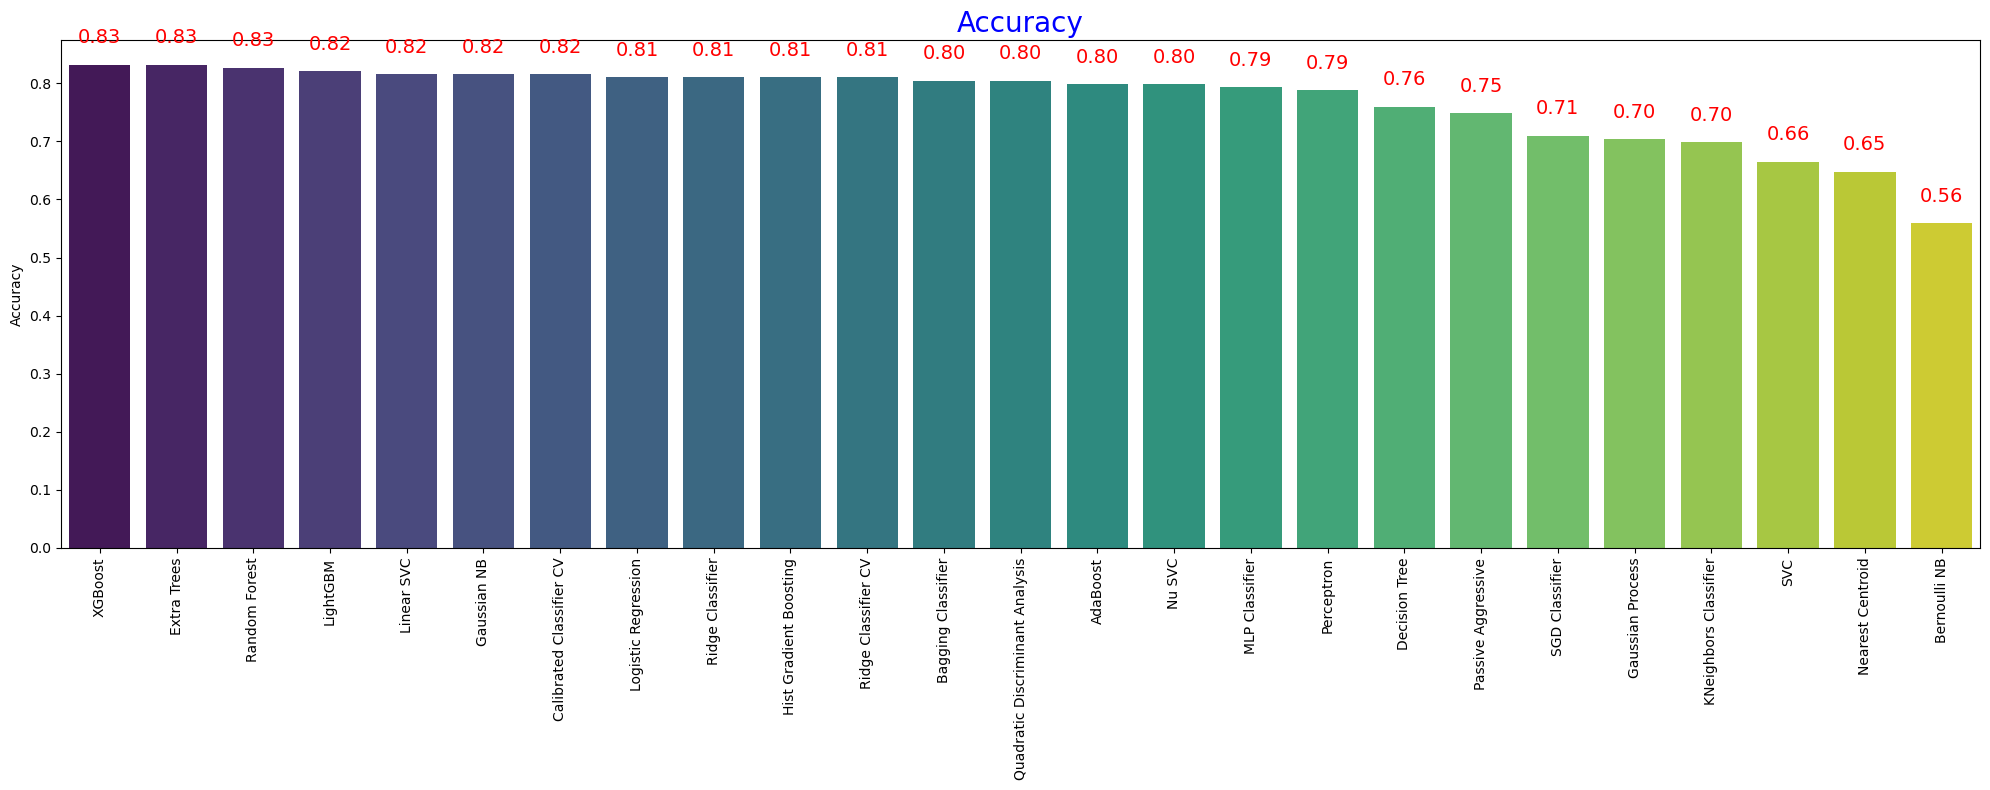

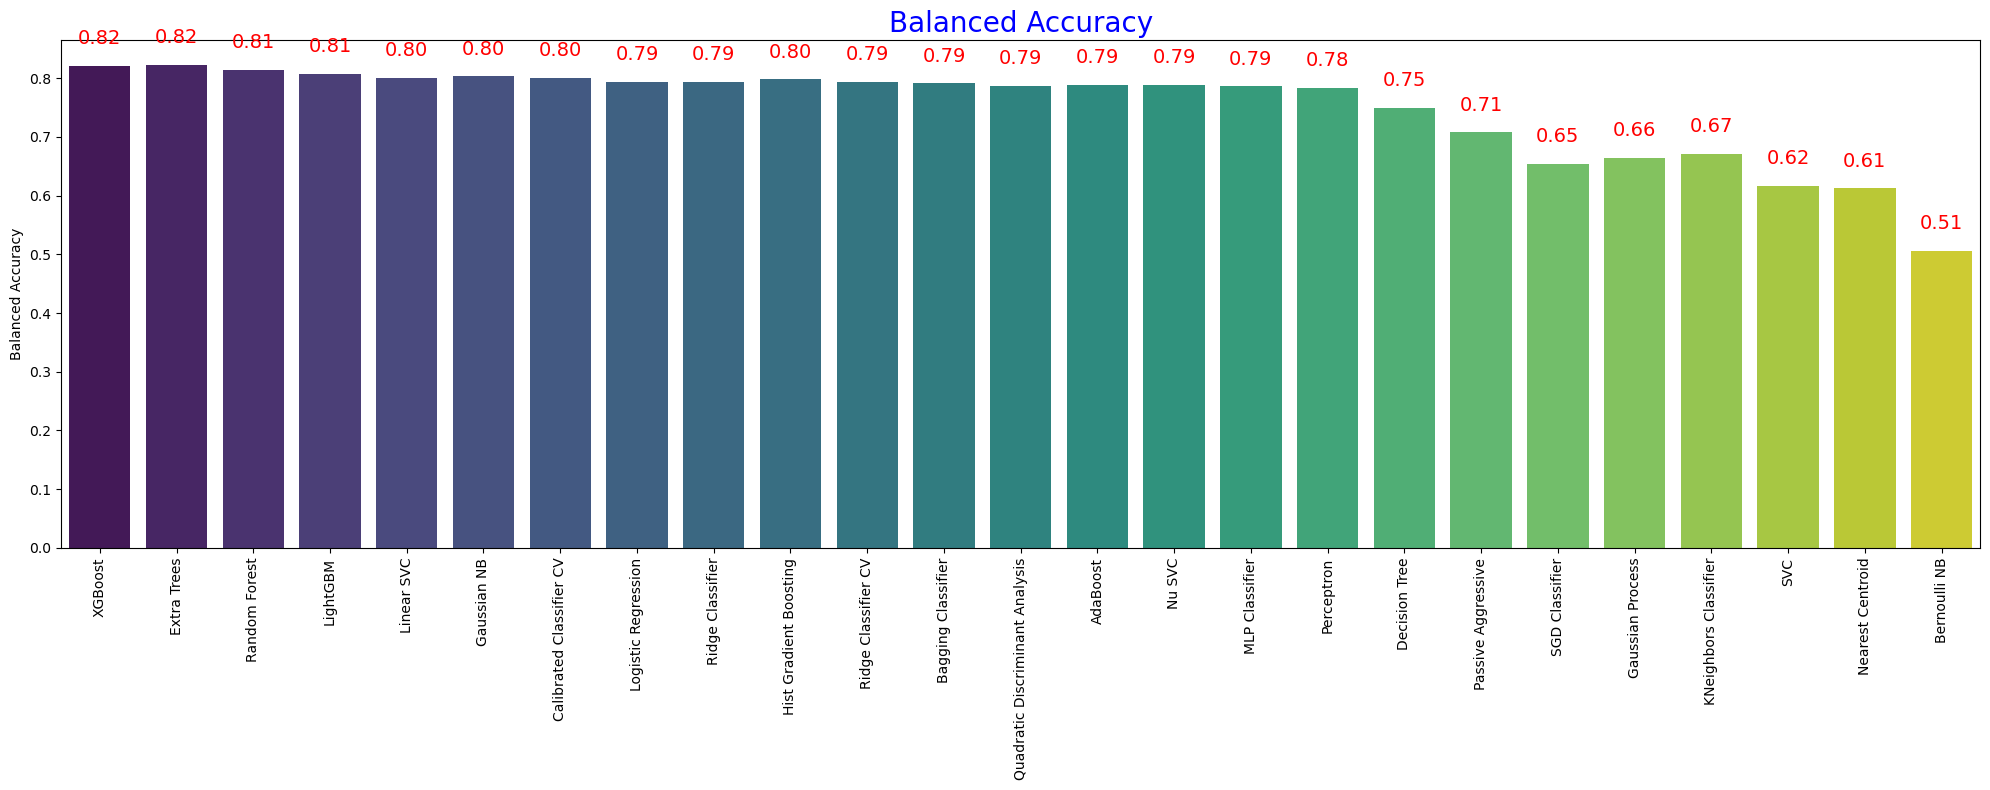

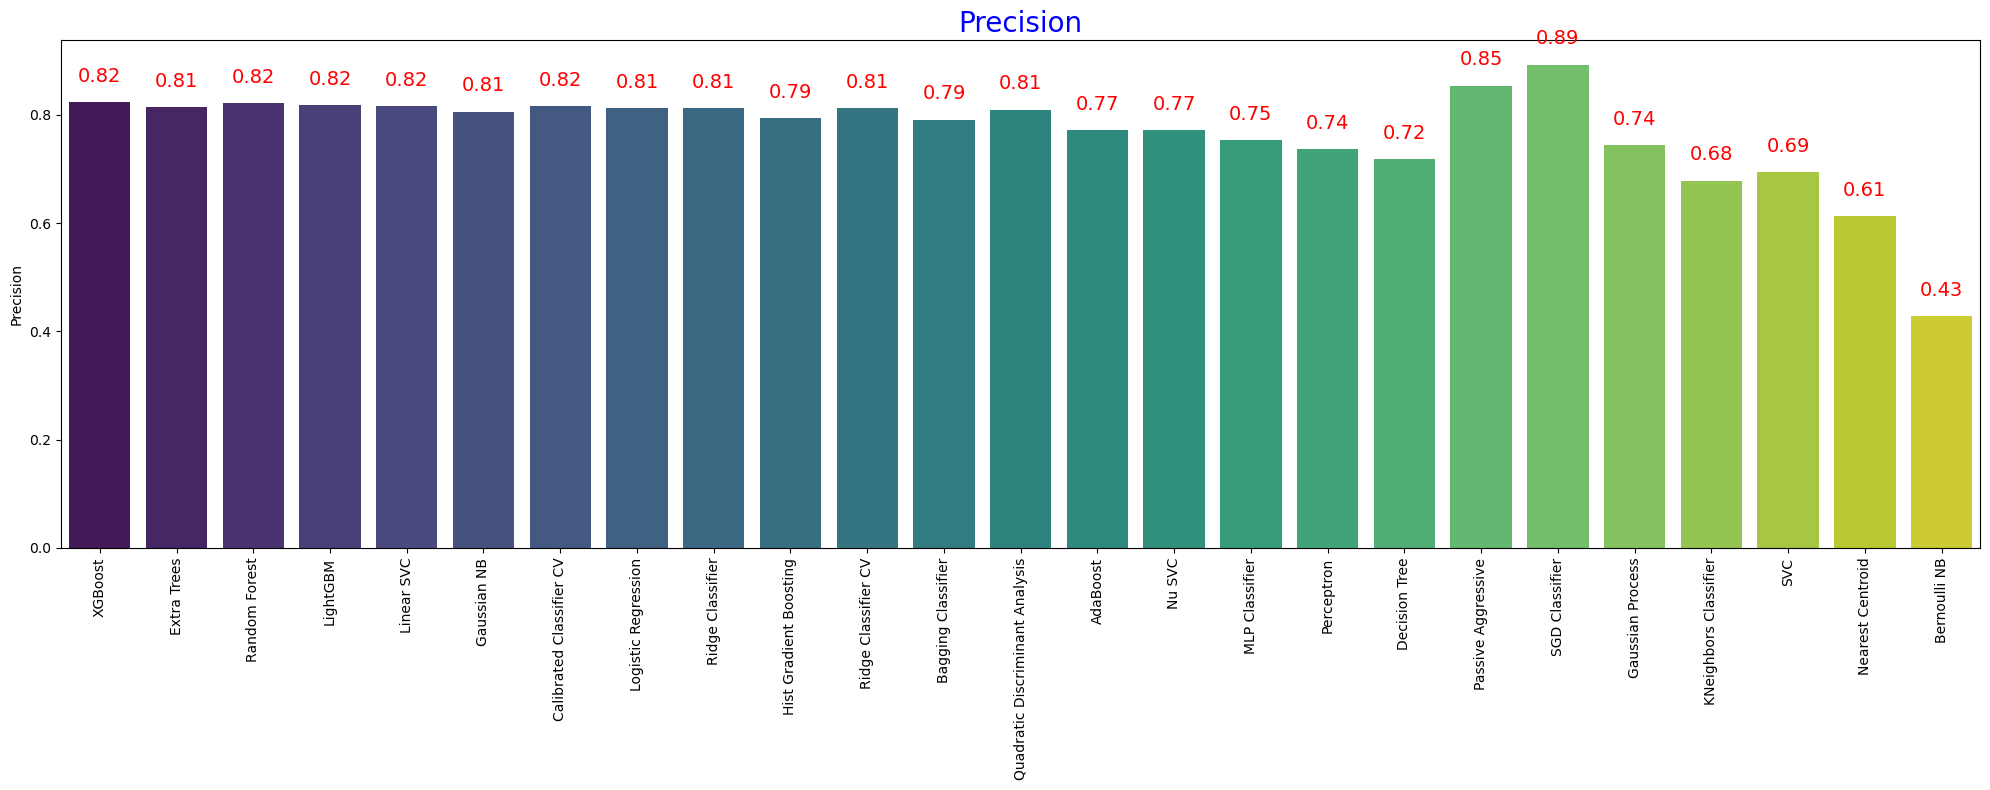

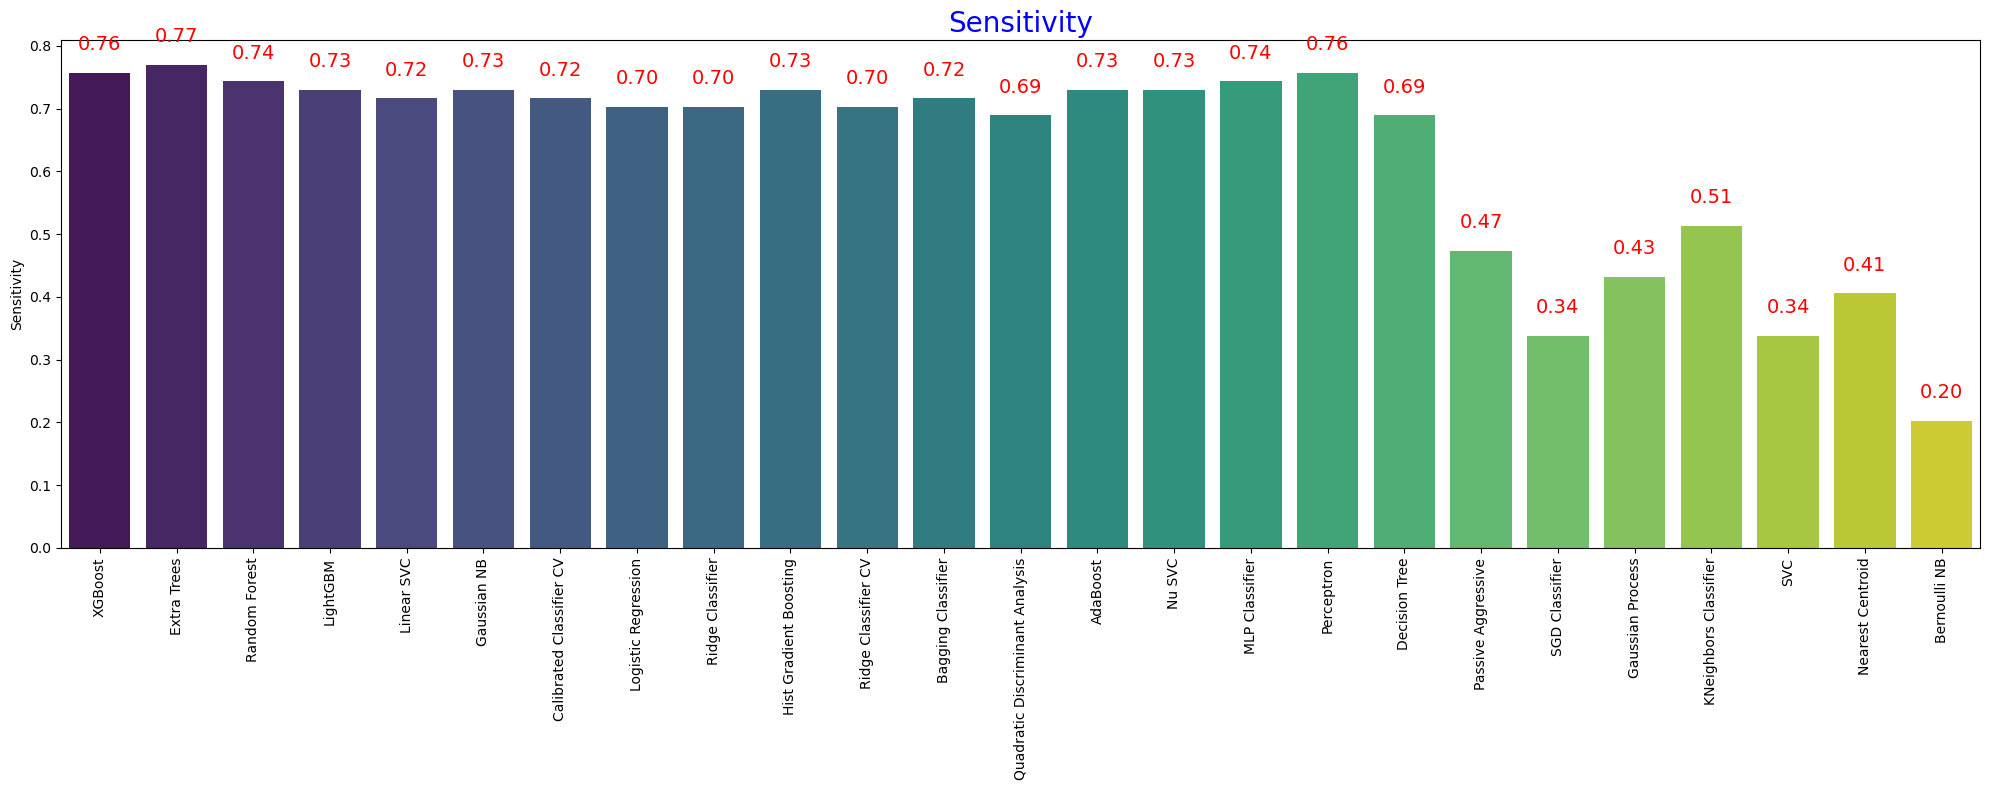

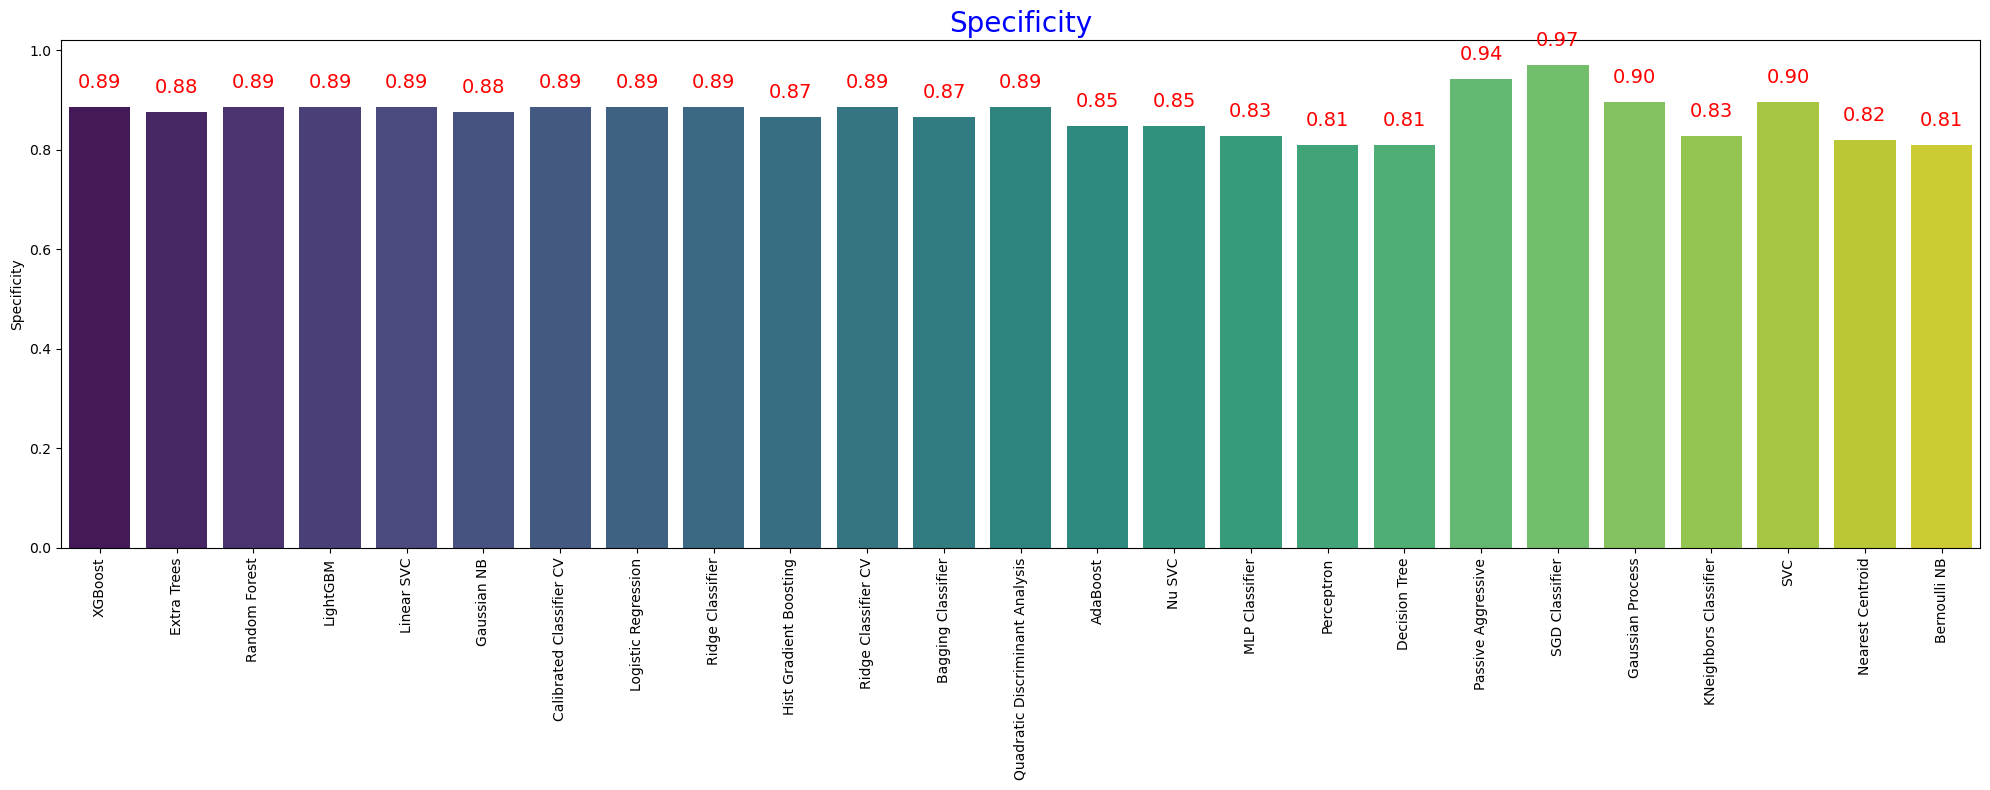

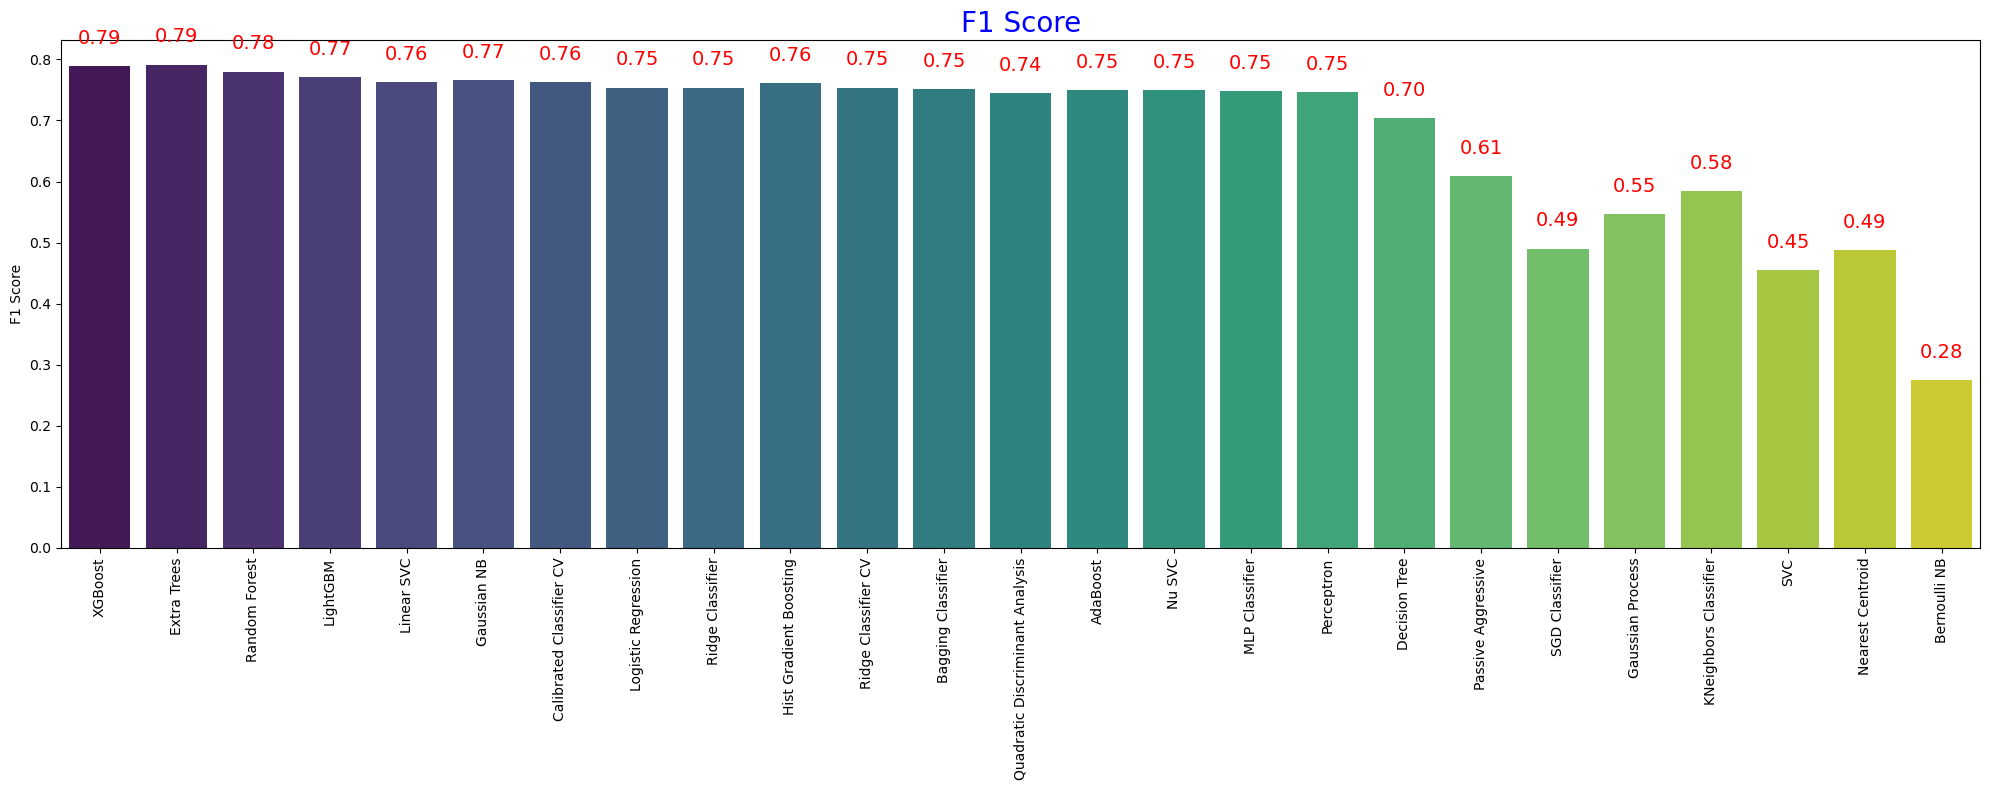

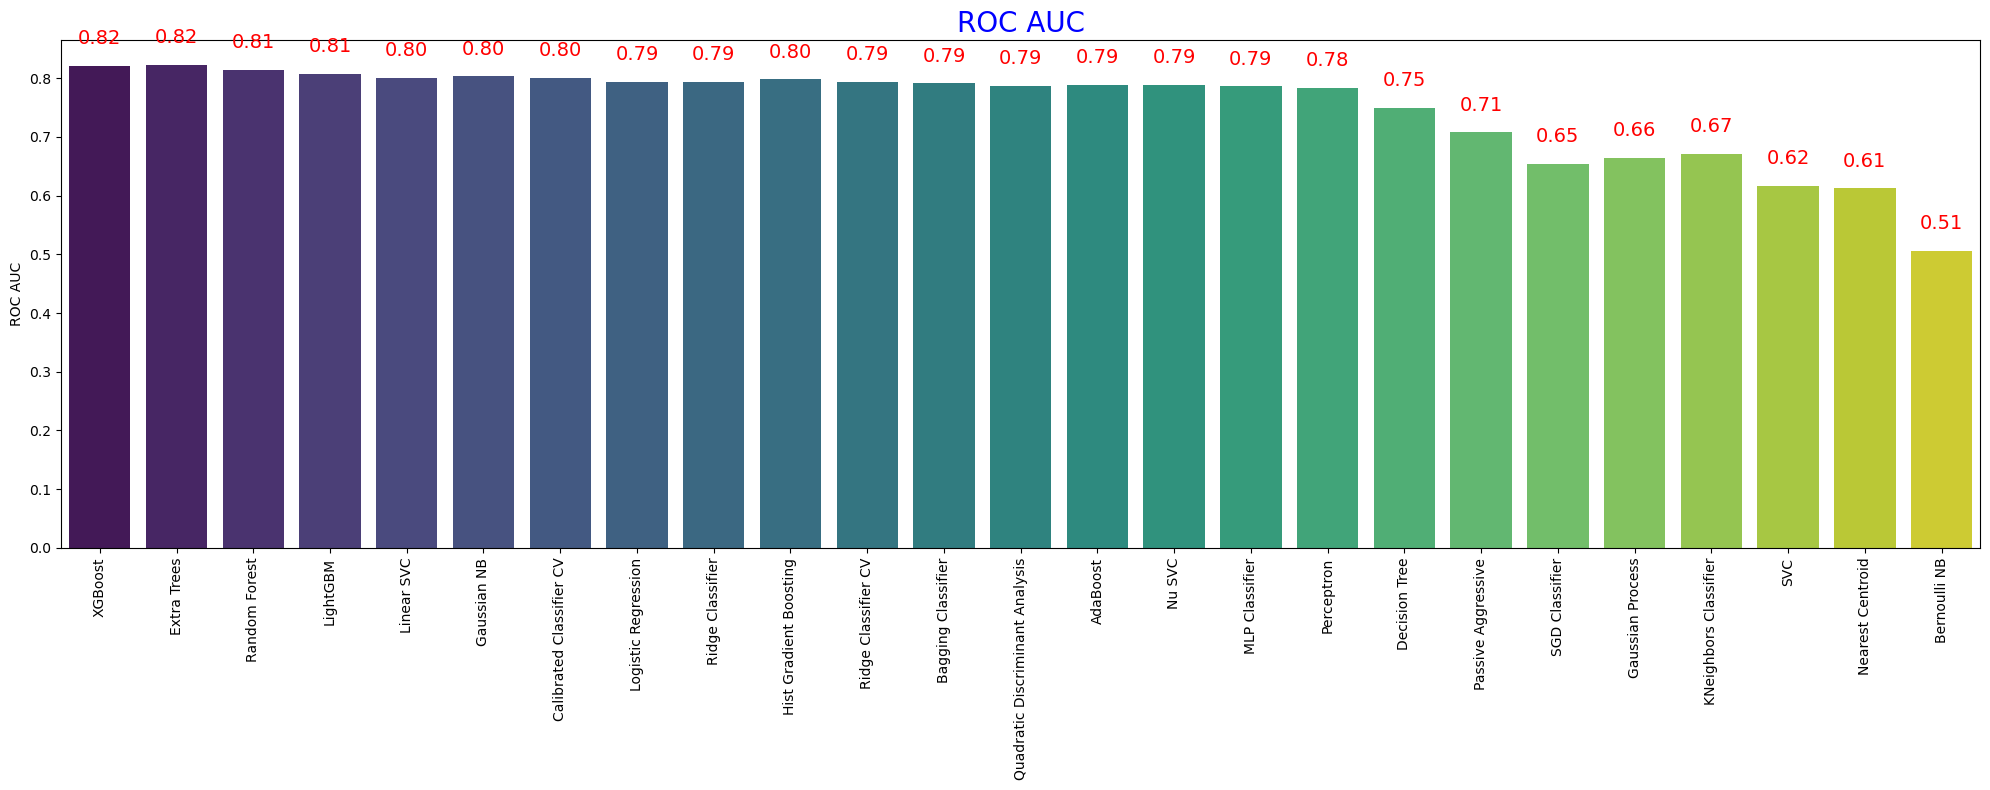

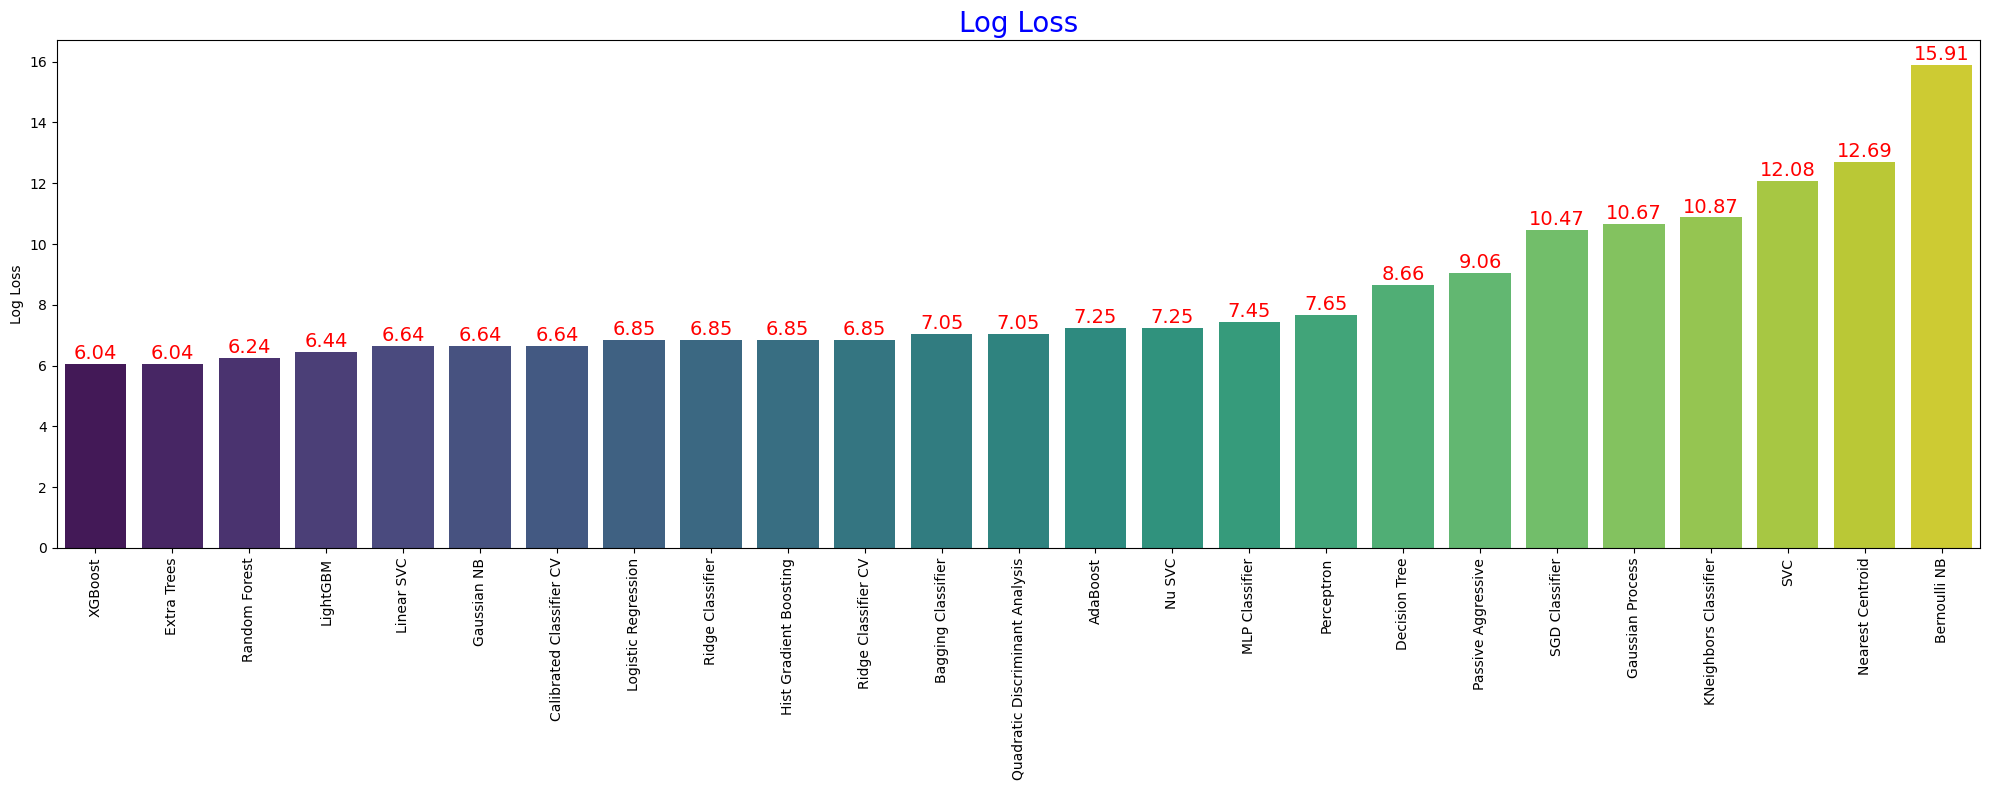

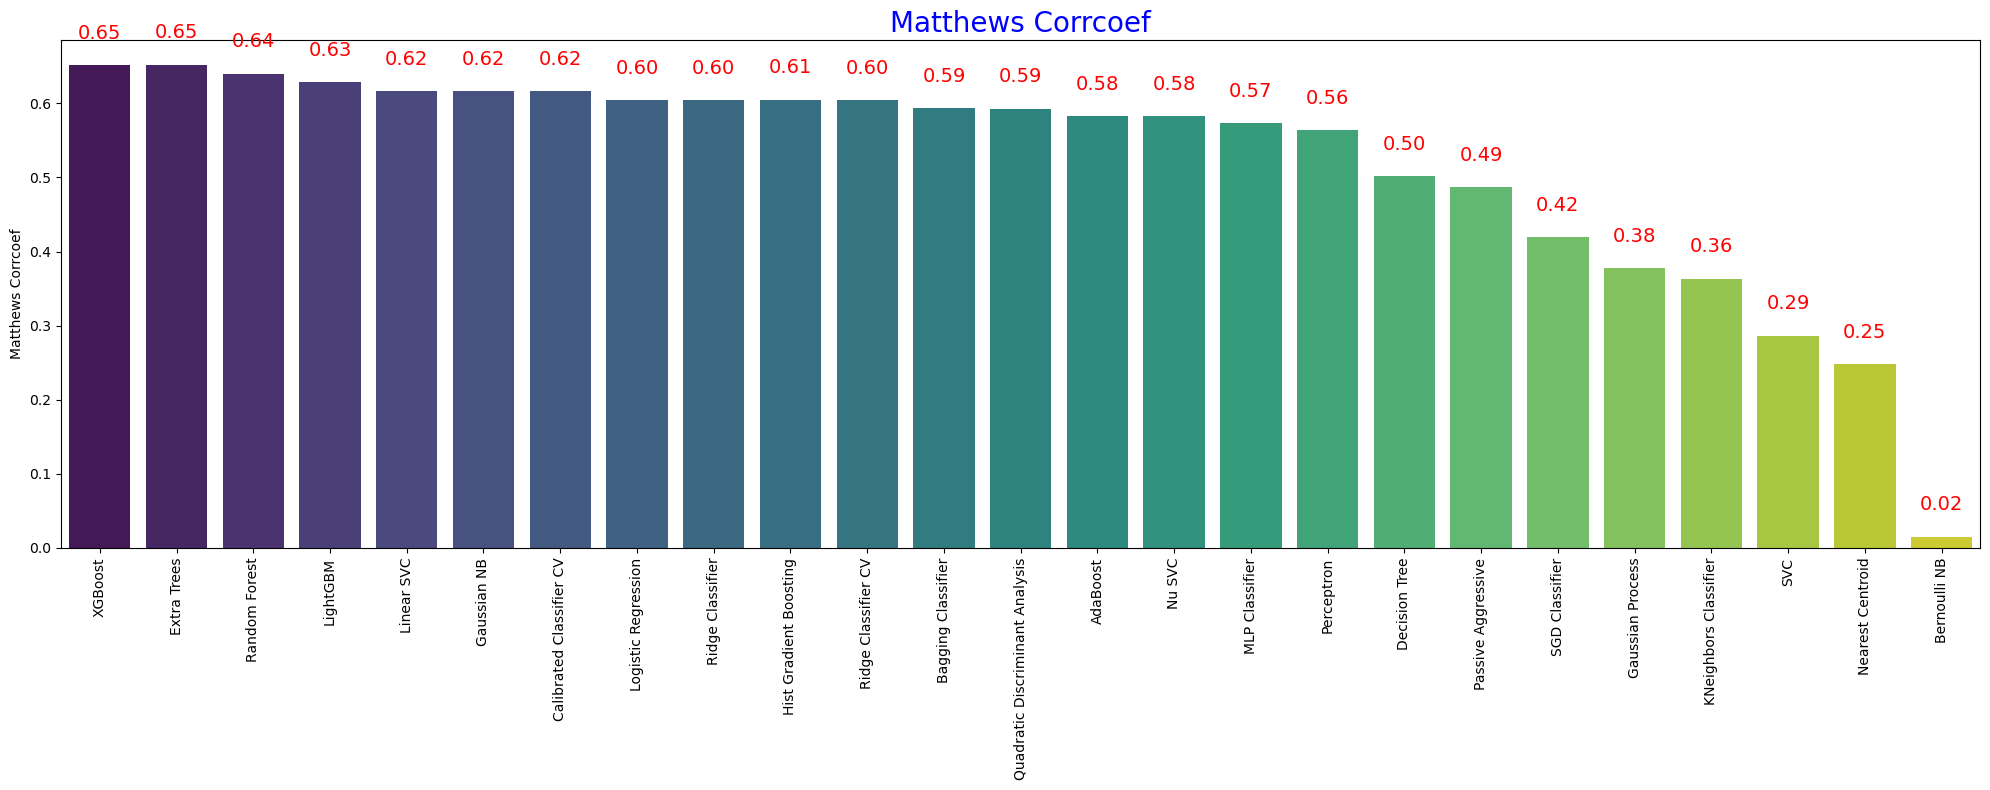

In [34]:
# List of metrics to plot
metrics = [
    'Accuracy',  # Assuming this is the column for model accuracy
    'Balanced Accuracy',
    'Precision',
    'Sensitivity',
    'Specificity',
    'F1 Score',
    'ROC AUC',
    'Log Loss',
    'Matthews Corrcoef'
]

# Loop through each metric and create a separate plot
for metric in metrics:
  # Create a new figure for each plot
  fig, ax = plt.subplots(figsize=(20, 8))  # Adjust figure size as needed

  # Create bar plot with Seaborn
  sns.barplot(x="Model", y=metric, data=model_results, palette="viridis", ax=ax)

  # Extract bar values (assuming a numerical column for metric values)
  bar_values = model_results[metric]

  # Add value annotations above each bar
  for i, (model, value) in enumerate(zip(model_results["Model"], bar_values)):
    ax.text(i, value + 0.03, f"{value:.2f}", ha='center', va='bottom', fontsize=14, color='red')

  # Set title and labels with increased font size and space before the plot
  ax.set_title(f"{metric}", fontsize=20, color='Blue')
  ax.set_xlabel("")
  ax.set_ylabel(f"{metric}")

  # Increase space above the plot using `top` prop in `plt.subplots_adjust`
  plt.subplots_adjust(top=0.95)  # Adjust value as needed

  # Rotate x-axis labels if many models
  if len(model_results["Model"]) > 5:
    ax.set_xticklabels(model_results["Model"], rotation=90)

  # Adjust spacing within the plot
  plt.tight_layout()

# Show all plots at once
plt.show()